# 実装手順
TensorFlowアルゴリズムの一般的な流れ

> **1. データセットをインポートまたは生成**<br>
> **2. データを変換/正規化**<br>
> **3. データセットをトレーニングセット、テストセット、検証セットに分割**<br>
> **4. アルゴリズムのパラメータ$\beta...$(ハイパーパラメータ$\alpha ...$)を設定**<br>
```python
learning_rate = 0.01    # 学習率
batch_size = 100       # バッチサイズ
iterations = 1000       # 繰り返しの回数
```
> **5. 変数とプレースホルダを初期化**<br>
```python
Ha_var = tf.constant(42)
x_input = tf.placeholder(shape=[None, input_size], dtype=tf.float32)
Y_input = tf.placeholder(shape=[None, num_classes], dtype=tf.float32)
```
> **6. モデル構造を定義**<br>
```python
Hy_pred = tf.add(tf.multiply(x_input, weight_matrix), b_matrix)
```
> **7. 損失関数を設定**<br>
```python
loss = tf.reduce_mean(tf.square(y_actual - y_pred))
```
> **8. モデルの初期化とトレーニング**<br>
```python
with tf.Session(graph=graph) as session:
    ...
    session.run(...)
    ...
```
> **9. モデルを評価** : モデルを構築してトレーニングした後は、モデルを評価すべきである<br>
> **10. ハイパーパラメータをチューニング** : ほとんどの場合は、モデルのパフォーマンス(性能)に基づき、一旦戻ってハイパーパラメータを変更することになる。<br>
> **11. デプロイと新しい成果指標の予測**


---
# 活性化関数を実装する
ニューラルネットワークに不可欠な活性化関数を実装する。

## 活性化関数のライブラリ
活性化関数は、TensorFlowのニューラルネットワーク(nn)ライブラリでサポートされている。
```python
from tensorflow import nn
```

 - TensorFlowの演算を使ってカスタムの活性化関数を設計することもできる
 - あらかじめ定義されている活性化関数をインポートしてもよい

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

sess = tf.Session()

AttributeError: module 'tensorflow' has no attribute 'Session'

### ReLU(Rectified Linear Unit)関数
$$
f\left( u \right) = \max {\left( u, 0 \right)}
$$

In [2]:
print(sess.run(tf.nn.relu([-3.0, -3.0, 10.0])))

NameError: name 'sess' is not defined

### ReLU6関数
$$
f\left( u \right) = \min {\left( \max {\left(0, u\right)}, 6 \right)}
$$

In [3]:
print(sess.run(tf.nn.relu6([-3.0, -3.0, 10.0])))

[0. 0. 6.]


### シグモイド関数(sigmoid function), ロジスティック関数
$$
f\left( u \right) = \frac {1}{1 + \mathrm {exp}\left( - u \right)}
$$

In [4]:
print(sess.run(tf.nn.sigmoid([-1.0, 0.0, 1.0])))

[0.26894143 0.5        0.7310586 ]


### 双曲線正接関数

In [ ]:
print(sess.run(tf.nn.tanh([-1.0, 0.0, 1.0])))

### ソフトサイン関数

In [ ]:
print(sess.run(tf.nn.softsign([-1.0, 0.0, 1.0])))

### ソフトプラス関数

In [ ]:
print(sess.run(tf.nn.softplus([-1.0, 0.0, 1.0])))

### ELU(Exponential Linear Unit)

In [ ]:
print(sess.run(tf.nn.elu([-1.0, 0.0, 1.0])))

# 損失関数を実装する
TensorFlowで実装できる損失関数を取り上げる。

### `tf.reduce_mean()`
> テンソルの平均値を計算する関数

 - `axis` : 引数を与えない場合は、テンソルを構成する全要素の平均をとる

## 準備

In [20]:
import matplotlib.pyplot as plt
import tensorflow as tf

sess = tf.Session()

## 回帰編)

In [24]:
# -1.0 ~ 1.0 の範囲の値を500個出力する
x_vals = tf.linspace(-1.0, 1.0, 500)
# >>> <tf.Tensor 'LinSpace_1:0' shape=(500,) dtype=float32>
target = tf.constant(0.0)
# >>> <tf.Tensor 'Const_5:0' shape=() dtype=float32>

### L2ノルム損失関数(ユークリッド損失関数, Euclidean loss function)
$$
{\left( y - \hat {y} \right)}^{2}
$$

 - 優れている点 : 目的値の近くでとがった急なカーブを描く。そのため、アルゴリズムは目的値にゆっくりと近づきながら収束することができる。

In [27]:
l2_y_vals = tf.square(target - x_vals)
l2_y_out = sess.run(l2_y_vals)
l2_y_out

array([1.00000000e+00, 9.92000103e-01, 9.84032154e-01, 9.76096511e-01,
       9.68192935e-01, 9.60321426e-01, 9.52482104e-01, 9.44674969e-01,
       9.36899841e-01, 9.29156899e-01, 9.21446025e-01, 9.13767397e-01,
       9.06120896e-01, 8.98506403e-01, 8.90924096e-01, 8.83373976e-01,
       8.75855863e-01, 8.68369997e-01, 8.60916257e-01, 8.53494525e-01,
       8.46105039e-01, 8.38747680e-01, 8.31422329e-01, 8.24129224e-01,
       8.16868246e-01, 8.09639275e-01, 8.02442551e-01, 7.95277953e-01,
       7.88145423e-01, 7.81045079e-01, 7.73976862e-01, 7.66940653e-01,
       7.59936750e-01, 7.52964914e-01, 7.46025085e-01, 7.39117563e-01,
       7.32241988e-01, 7.25398719e-01, 7.18587518e-01, 7.11808383e-01,
       7.05061436e-01, 6.98346555e-01, 6.91663861e-01, 6.85013294e-01,
       6.78394794e-01, 6.71808541e-01, 6.65254354e-01, 6.58732235e-01,
       6.52242362e-01, 6.45784557e-01, 6.39358819e-01, 6.32965326e-01,
       6.26603961e-01, 6.20274603e-01, 6.13977432e-01, 6.07712448e-01,
      

### L1ノルム損失関数(絶対損失関数, absolute loss function)
$$
\left| y - \hat {y} \right|
$$

 - 優れている点 : L1ノルムはL2ノルムよりも**外れ値にうまく対応する**
 - L1ノルムが目的値に対してなめらかではない→アルゴリズムがうまく収束しないことがある

In [29]:
l1_y_vals = tf.abs(target - x_vals)
l1_y_out = sess.run(l1_y_vals)
l1_y_out

array([1.        , 0.995992  , 0.99198395, 0.98797596, 0.98396796,
       0.9799599 , 0.9759519 , 0.9719439 , 0.96793586, 0.96392787,
       0.9599198 , 0.9559118 , 0.9519038 , 0.94789577, 0.94388777,
       0.9398798 , 0.9358717 , 0.9318637 , 0.92785573, 0.9238477 ,
       0.9198397 , 0.9158317 , 0.91182363, 0.90781564, 0.90380764,
       0.8997996 , 0.8957916 , 0.8917836 , 0.88777554, 0.88376755,
       0.87975955, 0.8757515 , 0.8717435 , 0.8677355 , 0.86372745,
       0.85971946, 0.8557114 , 0.8517034 , 0.8476954 , 0.84368736,
       0.83967936, 0.8356713 , 0.8316633 , 0.8276553 , 0.82364726,
       0.81963927, 0.8156313 , 0.8116232 , 0.8076152 , 0.8036072 ,
       0.7995992 , 0.7955912 , 0.7915832 , 0.7875751 , 0.78356713,
       0.77955914, 0.7755511 , 0.7715431 , 0.7675351 , 0.76352704,
       0.75951904, 0.75551105, 0.751503  , 0.747495  , 0.743487  ,
       0.73947895, 0.73547095, 0.73146296, 0.7274549 , 0.72344685,
       0.7194389 , 0.71543086, 0.7114228 , 0.70741487, 0.70340

### Pseudo-Huber損失関数
 - Huber損失関数に対して連続的に滑らかに近似する関数
 - この損失関数は、目的地の近くで凸形状になり、極端な値でも勾配が急にならない点で、L1, L2ノルムの長所を活かした関数

In [30]:
delta1 = tf.constant(0.25)
phuber1_y_vals = tf.multiply(tf.square(delta1), tf.sqrt(1.0 + tf.square((target - x_vals)/delta1)) - 1.0)
phuber1_y_out = sess.run(phuber1_y_vals)
phuber1_y_out

array([1.95194095e-01, 1.94222122e-01, 1.93250388e-01, 1.92278922e-01,
       1.91307634e-01, 1.90336585e-01, 1.89365774e-01, 1.88395262e-01,
       1.87424958e-01, 1.86454892e-01, 1.85485139e-01, 1.84515625e-01,
       1.83546349e-01, 1.82577342e-01, 1.81608602e-01, 1.80640161e-01,
       1.79671928e-01, 1.78704023e-01, 1.77736357e-01, 1.76769003e-01,
       1.75801963e-01, 1.74835175e-01, 1.73868656e-01, 1.72902465e-01,
       1.71936601e-01, 1.70970991e-01, 1.70005724e-01, 1.69040769e-01,
       1.68076113e-01, 1.67111784e-01, 1.66147754e-01, 1.65184096e-01,
       1.64220735e-01, 1.63257748e-01, 1.62295029e-01, 1.61332756e-01,
       1.60370767e-01, 1.59409150e-01, 1.58447891e-01, 1.57486990e-01,
       1.56526446e-01, 1.55566275e-01, 1.54606521e-01, 1.53647125e-01,
       1.52688131e-01, 1.51729509e-01, 1.50771290e-01, 1.49813473e-01,
       1.48856103e-01, 1.47899121e-01, 1.46942526e-01, 1.45986423e-01,
       1.45030722e-01, 1.44075468e-01, 1.43120602e-01, 1.42166257e-01,
      

## 分類編)

In [32]:
x_vals = tf.linspace(-3.0, 5.0, 500)
target = tf.constant(1.0)
targets = tf.fill([500, ], 1.0)

### ヒンジ損失関数(hinge loss function)

In [33]:
hinge_y_vals = tf.maximum(0.0, 1.0 - tf.multiply(target, x_vals))
hinge_y_out = sess.run(hinge_y_vals)

### 交差エントロピー損失関数(cross-entropy loss function)

---
# バックプロパゲーション(誤差逆伝播法)を実装する

## `tf.train.GradientDescentOptimizer`クラス
> 勾配降下アルゴリズムを実装するオプティマイザー(最適化問題を解く機能)を提供するクラス

**`tf.train.GradientDescentOptimizer.__init__()`**

書式: 
```python
__init__(
    learning_rate,  # 学習率
    use_locking=False,  # Trueの場合、更新オペレーションのロックが使用される。
    name='GradientDescent'  # オペレーション名の接頭辞を指定。デフォルトは、`GradientDescent`。
)
```

**`GradientDescentOptimizerオブジェクト.minimize()`**
> 引数に指定したコスト関数が最小になる勾配を計算し、パラメータの値を更新する。戻り値は、更新後のパラメータ値のリスト.

書式:
```python
minimize(
    loss,    # 最小化するopノード(Tensorオブジェクト)
    global_step=None,  # オプション。更新された後に1ずつ増分する値を代入する変数を指定。
    var_list=None,    # 最小化するための更新時における損失を格納した変数のリスト、またはタプルを指定する。デフォルトで、TRAINABLE_VARIABLESというキー名で収集された変数のリストになる。
    gate_gradients=GATE_OP,  # オプション。勾配計算における可逆計算の方法を指定。`GATE_NONE`, `GATE_OP`, `GATE_GRAPH`が指定可能で、デフォルトは`GATE_OP`です。
    aggregation_method=None,  # オプション。勾配法の繰り返しによる段階的な変化を集計する方法を指定。`tf.AggregationMethod`クラスで定義する。
    colocate_gradients_with_ops=False,  # オプション。Trueの場合、対応するオペレーション勾配法の繰り返しによる段階的な変化の集計が行われる。
    name=None,  # オプション。実行されるオペレーションの名前を指定する。
    grad_loss=None  # オプション。勾配法に置ける損失(loss)を保持するTensorオブジェクトを指定
)
```

## 回帰の例

 - 説明変数$x$ : 平均1, 標準偏差0.1の正規分布から乱数を生成する
 - 目的変数$y$ : $y = 10$

回帰モデル:
$$
y = \beta x
$$

誤差関数(損失関数):
$$
E\left(\beta ;x\right) = \frac {1}{2} \sum _{n=1}^{N}{\left[ y_{n} - \beta x \right]^{2}}
$$

In [34]:
import numpy as np
import tensorflow as tf

sess = tf.Session()

In [54]:
# 乱数生成
N = 100
x_arr = np.random.normal(1, 0.1, N)
y_arr = np.repeat(10.0, N)

x_ph = tf.placeholder(shape=[1], dtype=tf.float32)
y_ph = tf.placeholder(shape=[1], dtype=tf.float32)

# 回帰係数\beta の初期値
beta = tf.Variable(tf.random_normal(shape=[1]))

In [55]:
# y = \beta x
pred_y_op = tf.multiply(beta, x_ph)

# 損失関数(最小二乗法)の定義
loss_func_op = tf.square(y_ph - pred_y_op)

In [56]:
# 変数の初期化
init = tf.global_variables_initializer()
sess.run(init)

In [57]:
# パラメータの更新方法の設定

#  勾配降下法OP
LR = 0.02   # Learning Rate(学習率)
gd_opt = tf.train.GradientDescentOptimizer(learning_rate=LR)

# 最小化の実行OP
train_step = gd_opt.minimize(loss_func_op)

In [58]:
for i in range(N):
    # 0 ~ 99までの値からランダムに１つ取得
    rand_index = np.random.choice(N)

    x = [x_arr[rand_index]]
    y = [y_arr[rand_index]]
    sess.run(train_step, feed_dict={x_ph: x, y_ph: y})
    
    # 25回おきに出力
    if (i + 1) % 25 == 0:
        print('学習回数 #' + str(i + 1) + ' β = ' + str(sess.run(beta)))
        print('損失値 = ' + str(sess.run(loss_func_op, feed_dict={x_ph: x, y_ph: y})[0]))

学習回数 #25 β = [6.173015]
損失値 = 13.422922
学習回数 #50 β = [8.694184]
損失値 = 2.4281623
学習回数 #75 β = [9.422168]
損失値 = 1.3165419
学習回数 #100 β = [9.614246]
損失値 = 0.014638762


## 二値分類の例

In [106]:
from tensorflow.python.framework import ops
ops.reset_default_graph()

sess = tf.Session()

In [107]:
M = 50

x_arr = np.concatenate([
        np.random.normal(-1, 1, M),
        np.random.normal(3, 1, M)
    ])
y_arr = np.concatenate([
        np.repeat(0, M),
        np.repeat(1, M)
    ])

# placeholder
x_ph = tf.placeholder(shape=[1], dtype=tf.float32)
y_ph = tf.placeholder(shape=[1], dtype=tf.float32)

# 回帰係数 \beta
beta = tf.Variable(tf.random_normal(mean=10, shape=[1]))

In [108]:
# 分類器
linear = tf.multiply(beta, x_ph)
logistic = (1 / (1 + tf.exp(-linear)))

# 損失関数(対数尤度関数)の定義
# loss = - (y_ph * tf.log(logistic) + (1 - y_ph) * tf.log(1 - logistic))
loss = tf.losses.sigmoid_cross_entropy(y_ph, logistic)

In [109]:
# 変数の初期化
init = tf.global_variables_initializer()
sess.run(init)

In [110]:
# 学習方法

#  勾配降下法OP
LR = 0.05   # Learning Rate(学習率)
gd_opt = tf.train.GradientDescentOptimizer(learning_rate=LR)

# 最小化の実行OP
train_step = gd_opt.minimize(loss)

In [111]:
for i in range(1400):
    rand_index = np.random.choice(M * 2)
    x = [x_arr[rand_index]]
    y = [y_arr[rand_index]]
    
    sess.run(train_step, feed_dict={x_ph: x, y_ph: y})
    
    if (i + 1) % 25 == 0:
        print('学習回数 ' + str(i + 1) + ' 回帰係数 = ' + str(sess.run(beta)))
        print('Loss = ' + str(sess.run(loss, feed_dict={x_ph : x, y_ph : y})))

学習回数 25 回帰係数 = [9.212005]
Loss = 0.6931472
学習回数 50 回帰係数 = [9.214149]
Loss = 0.3132617
学習回数 75 回帰係数 = [9.213733]
Loss = 0.7673598
学習回数 100 回帰係数 = [9.216494]
Loss = 0.76030827
学習回数 125 回帰係数 = [9.217483]
Loss = 0.6931472
学習回数 150 回帰係数 = [9.21866]
Loss = 0.3132617
学習回数 175 回帰係数 = [9.219547]
Loss = 0.3132617
学習回数 200 回帰係数 = [9.218741]
Loss = 0.3132617
学習回数 225 回帰係数 = [9.219807]
Loss = 0.3132617
学習回数 250 回帰係数 = [9.222299]
Loss = 0.6931472
学習回数 275 回帰係数 = [9.221052]
Loss = 0.3132617
学習回数 300 回帰係数 = [9.220711]
Loss = 1.2309006
学習回数 325 回帰係数 = [9.221847]
Loss = 1.3118386
学習回数 350 回帰係数 = [9.222235]
Loss = 0.69361764
学習回数 375 回帰係数 = [9.222326]
Loss = 0.6931481
学習回数 400 回帰係数 = [9.221705]
Loss = 0.3132617
学習回数 425 回帰係数 = [9.223713]
Loss = 0.3132617
学習回数 450 回帰係数 = [9.224188]
Loss = 0.7602127
学習回数 475 回帰係数 = [9.223239]
Loss = 0.3132617
学習回数 500 回帰係数 = [9.222658]
Loss = 0.6931473
学習回数 525 回帰係数 = [9.22129]
Loss = 1.311838
学習回数 550 回帰係数 = [9.221315]
Loss = 0.6931843
学習回数 575 回帰係数 = [9.219508]
Loss = 0.

## 機械学習モデリングの流れ

 1. データを取得(作成)する
 2. 特徴ベクトル(プレースホルダ)とβ(変数)を定義&初期化
 3. 損失関数を作成する
 4. 最適化アルゴリズムを定義する
 5. データを繰り返し処理しながらβ(変数)を更新する

---
# バッチトレーニングと確率的トレーニングを使用する

In [143]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf


sess = tf.Session()

In [144]:
# バッチサイズを設定
batch_size = 20

N = 100    # サンプル数
x_arr = np.random.normal(1, 0.1, N)
y_arr = np.repeat(10.0, N)

# shape = [行数, 列数]
x_ph = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_ph = tf.placeholder(shape=[None, 1], dtype=tf.float32)
# 行数にNoneを指定することで、一般化が可能になる

# 重み
w = tf.Variable(tf.random_normal(shape=[1, 1]))

# モデル
model = tf.matmul(x_ph, w)

# 損失関数
loss = tf.reduce_mean(tf.square(y_ph - model))

In [145]:
# 変数を初期化
init = tf.global_variables_initializer()
sess.run(init)

In [146]:
# 最適化アルゴリズム(勾配降下法)
LR = 0.02
train_alg = tf.train.GradientDescentOptimizer(LR)
train_step = train_alg.minimize(loss)

## ミニバッチ勾配降下法

In [147]:
loss_batch = []
for i in range(100):
    # 0 ~ 99までの値をランダムにバッチサイズ分取得
    rand_i_arr = np.random.choice(100, size=batch_size)
    x_batch = np.transpose([x_arr[rand_i_arr]])
    y_batch = np.transpose([y_arr[rand_i_arr]])

    sess.run(train_step, feed_dict={x_ph: x_batch, y_ph: y_batch})

    if (i + 1) % 5 == 0:
        print('学習回数 # ' + str(i + 1) + ' w = ' + str(sess.run(w)))
        temp_loss = sess.run(loss, feed_dict={x_ph: x_batch, y_ph: y_batch})
        print('Loss = ' + str(temp_loss))
        loss_batch.append(temp_loss)

学習回数 # 5 w = [[-0.05320501]]
Loss = 101.09898
学習回数 # 10 w = [[1.8203571]]
Loss = 66.121254
学習回数 # 15 w = [[3.3280709]]
Loss = 42.686623
学習回数 # 20 w = [[4.556994]]
Loss = 30.17272
学習回数 # 25 w = [[5.5545835]]
Loss = 19.882917
学習回数 # 30 w = [[6.363056]]
Loss = 14.660753
学習回数 # 35 w = [[7.033676]]
Loss = 10.034587
学習回数 # 40 w = [[7.56622]]
Loss = 6.6253386
学習回数 # 45 w = [[7.9967837]]
Loss = 3.9522424
学習回数 # 50 w = [[8.343511]]
Loss = 2.540404
学習回数 # 55 w = [[8.640075]]
Loss = 3.175443
学習回数 # 60 w = [[8.858718]]
Loss = 1.4730723
学習回数 # 65 w = [[9.047876]]
Loss = 1.9322689
学習回数 # 70 w = [[9.206279]]
Loss = 1.3198864
学習回数 # 75 w = [[9.323292]]
Loss = 1.7362907
学習回数 # 80 w = [[9.429322]]
Loss = 1.2158408
学習回数 # 85 w = [[9.502146]]
Loss = 1.0305623
学習回数 # 90 w = [[9.573799]]
Loss = 1.5652176
学習回数 # 95 w = [[9.628482]]
Loss = 0.87234557
学習回数 # 100 w = [[9.679321]]
Loss = 0.6064385


## 確率的勾配降下法

In [148]:
# 変数を初期化
init = tf.global_variables_initializer()
sess.run(init)

In [149]:
loss_stochastic = []
for i in range(100):
    rand_i = np.random.choice(N)
    x = [[x_arr[rand_i]]]
    y = [[y_arr[rand_i]]]
    sess.run(train_step, feed_dict={x_ph: x, y_ph: y})
    if (i+1) % 5 == 0:
        print('学習回数 # ' + str(i + 1) + ' w = ' + str(sess.run(w)))
        temp_loss = sess.run(loss, feed_dict={x_ph: x, y_ph: y})
        print('Loss = ' + str(temp_loss))
        loss_stochastic.append(temp_loss)

学習回数 # 5 w = [[0.43311167]]
Loss = 91.8359
学習回数 # 10 w = [[2.2723286]]
Loss = 58.231907
学習回数 # 15 w = [[3.699391]]
Loss = 41.3515
学習回数 # 20 w = [[4.8580394]]
Loss = 29.87171
学習回数 # 25 w = [[5.789158]]
Loss = 18.043394
学習回数 # 30 w = [[6.50748]]
Loss = 11.609216
学習回数 # 35 w = [[7.1280894]]
Loss = 4.919052
学習回数 # 40 w = [[7.653252]]
Loss = 4.0361433
学習回数 # 45 w = [[8.15344]]
Loss = 6.55894
学習回数 # 50 w = [[8.4363985]]
Loss = 1.7596325
学習回数 # 55 w = [[8.64426]]
Loss = 3.701856
学習回数 # 60 w = [[8.89817]]
Loss = 1.342263
学習回数 # 65 w = [[9.144054]]
Loss = 0.7096676
学習回数 # 70 w = [[9.276949]]
Loss = 1.1552781
学習回数 # 75 w = [[9.283585]]
Loss = 0.093872376
学習回数 # 80 w = [[9.433737]]
Loss = 1.9688288
学習回数 # 85 w = [[9.455384]]
Loss = 0.00078020594
学習回数 # 90 w = [[9.498157]]
Loss = 0.35528272
学習回数 # 95 w = [[9.479033]]
Loss = 0.36847258
学習回数 # 100 w = [[9.45856]]
Loss = 0.17428277


## ミニバッチ勾配降下法と確率的勾配降下法

/Users/taiyou/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['[IPAexGothic]'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


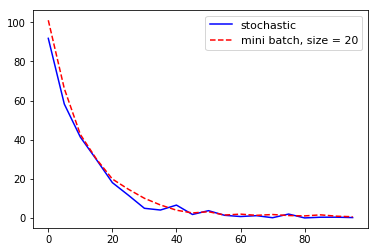

In [152]:
plt.plot(range(0, 100, 5), loss_stochastic, 'b-', label='stochastic')
plt.plot(range(0, 100, 5), loss_batch, 'r--', label='mini batch, size = 20')
plt.legend(loc='upper right', prop={'size': 11})
plt.show()

# 分類を行うための要素を組み合わせる
ある花の品種がSetosaかどうかを予測する単純な二値分類器を実行する。

In [196]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
import tensorflow as tf


sess = tf.Session()

## データセットを取得する

In [197]:
# データセットの取得
iris = datasets.load_iris()
print(iris.target)
print(iris.data)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 

In [198]:
teacher_arr = np.array([1.0 if y == 0.0 else 0 for y in iris.target])
feature_arr = np.array([[x[2], x[3]] for x in iris.data])

## 特徴ベクトル(プレースホルダ)とβ(変数)を定義

In [199]:
# バッチサイズ
batch_size = 20 

# 特徴量
x_ph = tf.placeholder(shape=[None, 2], dtype=tf.float32)
# x2_ph = tf.placeholder(shape=[None, 1], dtype=tf.float32)
# 教師データ
y_ph = tf.placeholder(shape=[None, 1], dtype=tf.float32)

# 重み
w = tf.Variable(tf.random_normal(shape=[1, 2]))
b = tf.Variable(tf.random_normal(shape=[1, 1]))

## 分類モデル&損失関数の定義

In [203]:
# モデル(ロジスティック回帰)
linear = tf.add(
        tf.matmul(w, x_ph),
        b
    )
model = 1 / (1 + tf.exp(- linear))

# 損失関数(対数尤度関数)の定義
loss = - tf.add(
        tf.matmul(y_ph,  tf.log(model)), 
        tf.matmul(
            (1.0 - y_ph), 
            tf.log(1.0 - model)
        )
    )

## 変数の初期化

In [205]:
# 変数を初期化
init = tf.global_variables_initializer()
sess.run(init)

## 最適化アルゴリズムの設定

In [206]:
# 最適化アルゴリズム(勾配降下法)
LR = 0.02
train_alg = tf.train.GradientDescentOptimizer(LR)
train_step = train_alg.minimize(loss)

## 学習 : 確率的勾配降下法

In [218]:
for i in range(1000):
    rand_i = np.random.choice(len(feature_arr), size=batch_size)
    x = feature_arr[rand_i]
    y = np.array([[c] for c in teacher_arr[rand_i]])
    sess.run(
        train_step, 
        feed_dict={
            x_ph: x, 
            y_ph: y
        }
    )

InvalidArgumentError: Matrix size-incompatible: In[0]: [1,2], In[1]: [20,2]
	 [[Node: MatMul_34 = MatMul[T=DT_FLOAT, transpose_a=false, transpose_b=false, _device="/job:localhost/replica:0/task:0/device:CPU:0"](Variable_28/read, _arg_Placeholder_47_0_0)]]

Caused by op 'MatMul_34', defined at:
  File "/Users/taiyou/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/taiyou/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/taiyou/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/taiyou/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Users/taiyou/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 486, in start
    self.io_loop.start()
  File "/Users/taiyou/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/tornado/platform/asyncio.py", line 132, in start
    self.asyncio_loop.run_forever()
  File "/Users/taiyou/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/asyncio/base_events.py", line 421, in run_forever
    self._run_once()
  File "/Users/taiyou/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/asyncio/base_events.py", line 1426, in _run_once
    handle._run()
  File "/Users/taiyou/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/asyncio/events.py", line 127, in _run
    self._callback(*self._args)
  File "/Users/taiyou/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/tornado/platform/asyncio.py", line 122, in _handle_events
    handler_func(fileobj, events)
  File "/Users/taiyou/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/tornado/stack_context.py", line 300, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/taiyou/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 450, in _handle_events
    self._handle_recv()
  File "/Users/taiyou/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 480, in _handle_recv
    self._run_callback(callback, msg)
  File "/Users/taiyou/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 432, in _run_callback
    callback(*args, **kwargs)
  File "/Users/taiyou/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/tornado/stack_context.py", line 300, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/taiyou/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/Users/taiyou/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "/Users/taiyou/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/Users/taiyou/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/Users/taiyou/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/Users/taiyou/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2662, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/Users/taiyou/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2785, in _run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/Users/taiyou/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2901, in run_ast_nodes
    if self.run_code(code, result):
  File "/Users/taiyou/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2961, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-203-b891b945afad>", line 3, in <module>
    tf.matmul(w, x_ph),
  File "/Users/taiyou/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/tensorflow/python/ops/math_ops.py", line 2018, in matmul
    a, b, transpose_a=transpose_a, transpose_b=transpose_b, name=name)
  File "/Users/taiyou/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/tensorflow/python/ops/gen_math_ops.py", line 4456, in mat_mul
    name=name)
  File "/Users/taiyou/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/Users/taiyou/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/tensorflow/python/util/deprecation.py", line 454, in new_func
    return func(*args, **kwargs)
  File "/Users/taiyou/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 3155, in create_op
    op_def=op_def)
  File "/Users/taiyou/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1717, in __init__
    self._traceback = tf_stack.extract_stack()

InvalidArgumentError (see above for traceback): Matrix size-incompatible: In[0]: [1,2], In[1]: [20,2]
	 [[Node: MatMul_34 = MatMul[T=DT_FLOAT, transpose_a=false, transpose_b=false, _device="/job:localhost/replica:0/task:0/device:CPU:0"](Variable_28/read, _arg_Placeholder_47_0_0)]]
